In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [294]:
testMut_raw = pd.read_csv('/Users/suongsuong/Desktop/test mut.csv')
testMut_raw

,SmB,LgB,LgB.1,I144L,I144L.1,Q13N,Q13N.1,S149M,S149M.1,V22M,V22M.1,T3S,T3S.1,E5H,E5H.1
0,86,592091,621483,730342,536888,140244,97885,402121,468982,3579,1944,657864,555779,641044,545207
1,86,657538,748439,899360,704234,156113,104556,444890,505872,3830,2166,766713,662460,670298,561599
2,104,5882,9012,8816,3586,5,136,23848,28574,28,12,5513,3199,26962,58339
3,104,6342,10247,9960,4179,1,150,26904,32534,41,10,6461,4107,28153,59433
4,78,293929,474753,279360,308888,41718,19788,308673,311854,335,279,292196,163485,574449,878874
5,78,334661,502621,297653,350106,47312,20857,321735,333142,323,377,318313,182996,613337,877906
6,79,327507,469758,489590,226127,18330,11175,342608,291828,301,1215,211620,173045,780459,957198
7,79,369448,548070,554165,286271,21170,12356,400761,365249,344,1428,261876,208813,817314,1014407
8,205,179,266,180,175,23,6,451,483,2,4,698,570,888,1912
9,205,202,380,243,181,25,16,522,562,10,3,924,555,1036,1999


### Rearrangment

In [295]:
testMut = pd.melt(testMut_raw, id_vars=['SmB'], var_name='protein', value_name='RLU')
replacements = {'LgB.1': 'LgB', 'I144L.1': 'I144L', 'Q13N.1': 'Q13N', 'S149M.1': 'S149M', 'V22M.1': 'V22M', 'T3S.1': 'T3S', 'E5H.1': 'E5H'}

for original, replacement in replacements.items():
    testMut['protein'] = testMut['protein'].str.replace(original, replacement)

testMut
#df.to_csv('extend_testmut.csv', index=False)

/var/folders/s4/9tl_p06528vgmf3960zqdvkh0000gn/T/ipykernel_1879/603707408.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  testMut['protein'] = testMut['protein'].str.replace(original, replacement)


,SmB,protein,RLU
0,86,LgB,592091
1,86,LgB,657538
2,104,LgB,5882
3,104,LgB,6342
4,78,LgB,293929
...,...,...,...
163,79,E5H,1014407
164,205,E5H,1912
165,205,E5H,1999
166,228,E5H,556654


# OVERVIEW of all collected data

### log scale

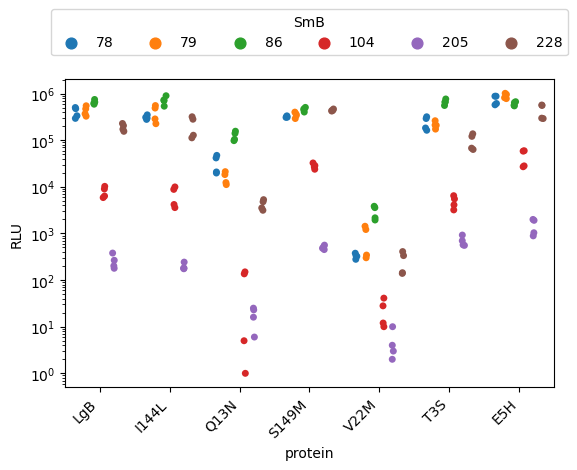

In [296]:

plt.figure(figsize=(6, 5))
sns.stripplot(data=testMut, x='protein', y='RLU', hue='SmB', dodge=True, jitter=True)

plt.ylabel('RLU')
plt.yscale('log')
plt.legend(title='SmB',bbox_to_anchor=(0.5,1.25), loc='upper center', ncol=len(df['SmB'].unique()))

plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

### normal scale

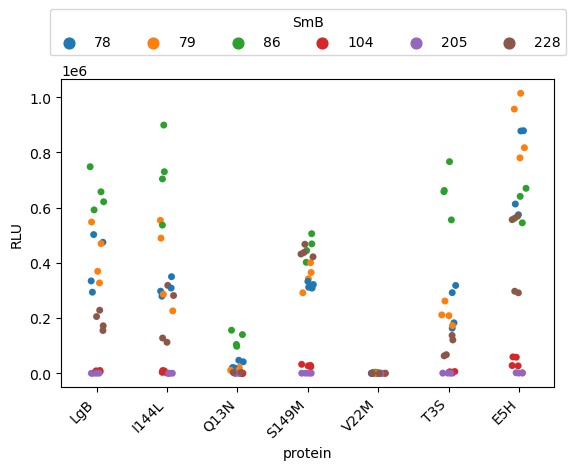

In [297]:
plt.figure(figsize=(6, 5))
sns.stripplot(data=df, x='protein', y='RLU', hue='SmB', jitter=True)
#sns.catplot(data=df, x="protein", y="RLU", hue="SmB", jitter=True)
plt.ylabel('RLU')

plt.legend(title='SmB',bbox_to_anchor=(0.5,1.25), loc='upper center', ncol=len(df['SmB'].unique()))
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

# Compare 2 SmBiTs

In [298]:
def plot_RLU_ratio(df, SmB1, SmB2):
    '''The function takes the data frame *test Mut* above and 
    2 SmBiTs to compare the ratio of RLU for each mutation'''
    
    #extract data and calculate
    df_filtered = df[df['SmB'].isin([SmB1, SmB2])]
    df_SmB1 = df_filtered[df_filtered['SmB'] == SmB1][['protein', 'RLU']].rename(columns={'RLU': 'RLU_SmB1'}).reset_index(drop=True)
    df_SmB2 = df_filtered[df_filtered['SmB'] == SmB2][['protein', 'RLU']].rename(columns={'RLU': 'RLU_SmB2'}).reset_index(drop=True)
    df_SmB1vsSmB2 = pd.concat([df_SmB1, df_SmB2], axis=1, join="inner").iloc[:, [0, 1, 3]]
    df_SmB1vsSmB2['log RLU_Ratio'] = np.log(df_SmB1vsSmB2['RLU_SmB1'] / df_SmB1vsSmB2['RLU_SmB2'])
    
    #Plotting
    lgB_mean = df_SmB1vsSmB2[df_SmB1vsSmB2['protein'] == 'LgB']['log RLU_Ratio'].mean()
    group_means = df_SmB1vsSmB2.groupby('protein')['log RLU_Ratio'].mean().reset_index()
    
    plt.figure(figsize=(4, 3))
    #jitter
    sns.stripplot(x='protein', y='log RLU_Ratio', data=df_SmB1vsSmB2,
                  color='blue', alpha=1, size=5, dodge=1, jitter = 1)
    #mean
    sns.pointplot(x='protein', y='log RLU_Ratio', data=df_SmB1vsSmB2,
                  color='black', join=False, ci=None, markers='_', scale = 2.5, estimator=np.mean)
    #LgB line
    plt.axhline(y=lgB_mean, color='black', linestyle='--')

    #plt.text(5, lgB_mean + 0.25, " ".join(["Prefer SmBiT", str(SmB1)]), size=8, fontstyle='italic')
    #plt.text(5, lgB_mean - 0.5, " ".join(["Prefer SmBiT", str(SmB2)]), size=8, fontstyle='italic')

    plt.xlabel("Protein", fontsize=8)
    plt.ylabel(" ".join(["Log(RLU_", str(SmB1), '/RLU_', str(SmB2)]), fontsize=8)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    
    plt.show()

# SmBiT 86 vs SmBiT 104

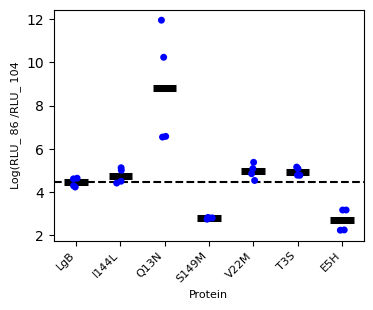

In [299]:
plot_RLU_ratio(testMut, 86, 104)

## <span style="color:red"> Compared to the output of GLM with Prof Rathbun's equation </span>



*notice that the y-axis of the plot is RLU_86 / RLU_104 so that mutation having lower value than the dash line prefers 104*

S149M was predicted to prefer 86 (B1) more but experimentally prefers 104

Q13N was predicted to prefer 104 (B2) more but experimentally prefers 86   - completely switched

E5H, I144L, T3S does not have a huge change but still does not align with the prediction

In [300]:
#result form Prof Rathbun's notebook
full_C8 = pd.read_csv('/Users/suongsuong/Documents/GitHub/GLMNanoBiT/GLM/develop model/full_C8.csv')
full_N8 = pd.read_csv('/Users/suongsuong/Documents/GitHub/GLMNanoBiT/GLM/develop model/full_N8.csv')

In [301]:
conditions = [(13, 'N'), (22, 'M'), (3, 'S'), (5, 'H')]
result_N8 = pd.concat([full_N8[(full_N8['pos'] == pos) & (full_N8['mut'] == mut)] for pos, mut in conditions])
result_N8

,pos,mut,Coefficient,P-value,alpha,B1_1,B2_1,B1_2,B2_2,library
267,13,N,1.018507,0.158649,NaN,12.0,13.0,0.1,2856.0,32.0
253,22,M,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,3,S,0.224746,0.776631,NaN,511.0,294.0,83.0,19719.0,283.0
163,5,H,0.425020,0.700307,NaN,673.0,0.1,0.1,1254.0,26.0


In [302]:
conditions = [(144, 'L'), (149, 'M')]
result_C8 = pd.concat([full_C8[(full_C8['pos'] == pos) & (full_C8['mut'] == mut)] for pos, mut in conditions])
result_C8

,pos,mut,Coefficient,P-value,alpha,B1_1,B2_1,B1_2,B2_2,library
195,144,L,0.856817,0.233633,NaN,240.0,660.0,3336.0,51741.0,674.0
221,149,M,-1.717695,0.022998,*,1077.0,0.1,1386.0,0.1,91.0


# Cross-plot?

plot 

86  vs  79

86  vs  78

86  vs  228

86  vs  104

86  vs  205

79  vs  78

79  vs  228

79  vs  104

79  vs  205

78  vs  228

78  vs  104

78  vs  205

228  vs  104

228  vs  205

104  vs  205

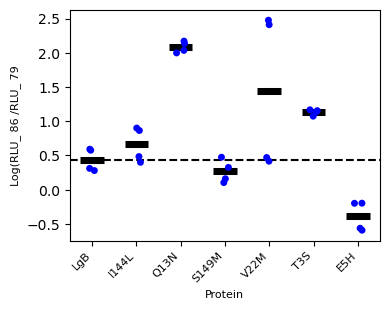

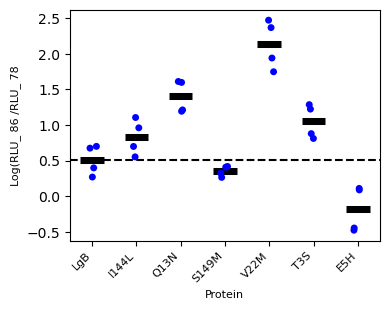

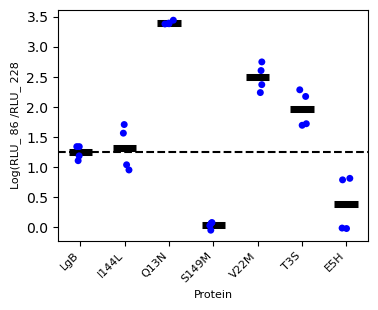

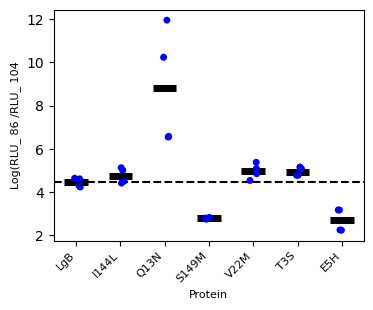

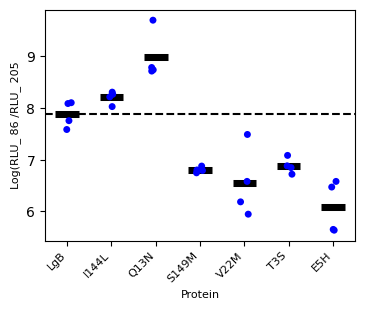

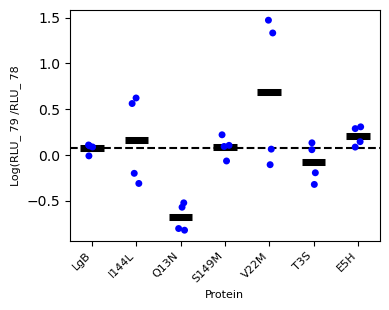

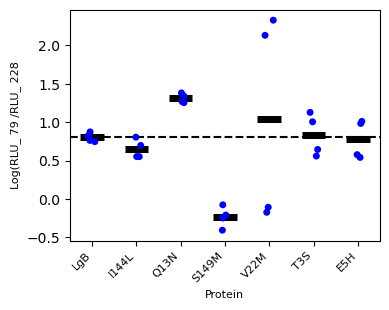

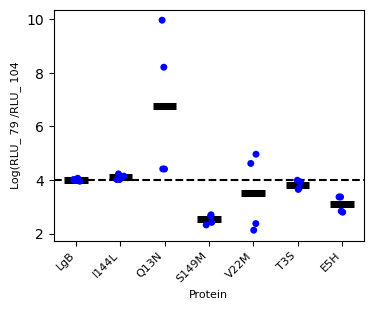

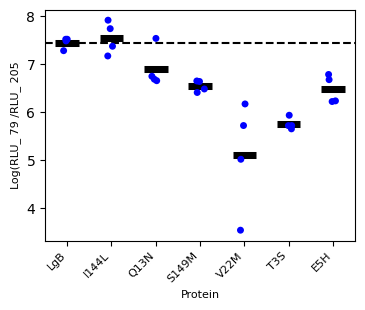

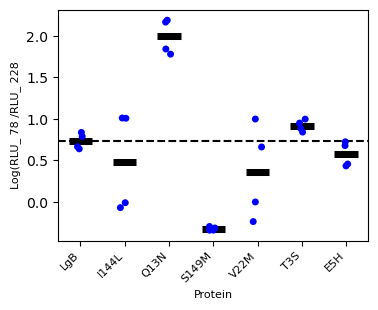

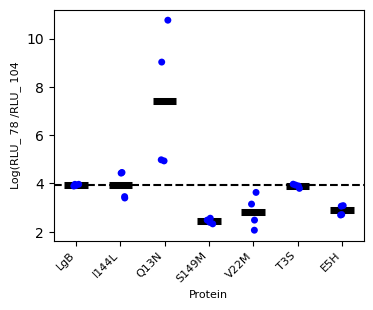

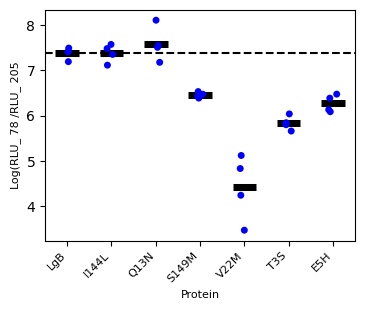

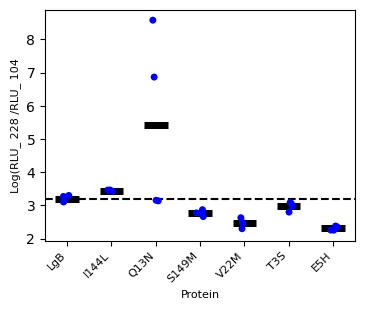

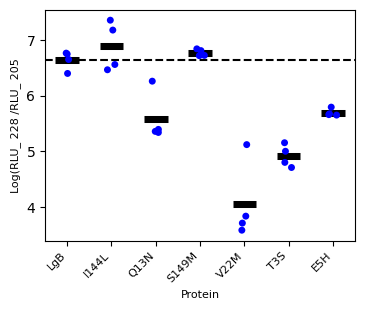

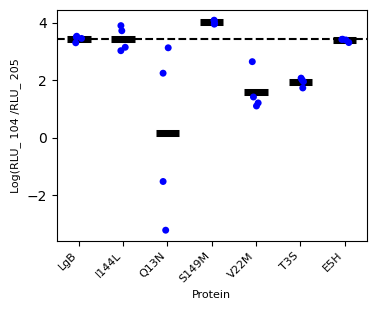

In [303]:
SmBs = [86,79,78,228,104,205] # Arrange based on preference to LgB to keep the logarit of LgB positive
for SmB1 in SmBs:
    count = 1
    SmBs = SmBs[count:]  # Remove plotted SmB
    for SmB2 in SmBs:
        plot_RLU_ratio(testMut, SmB1, SmB2)
    count += 1